In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats. One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

In [3]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# we know x,y,z represents dimensions but we see min 0 in x,y,z so they are most probably faulty data
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


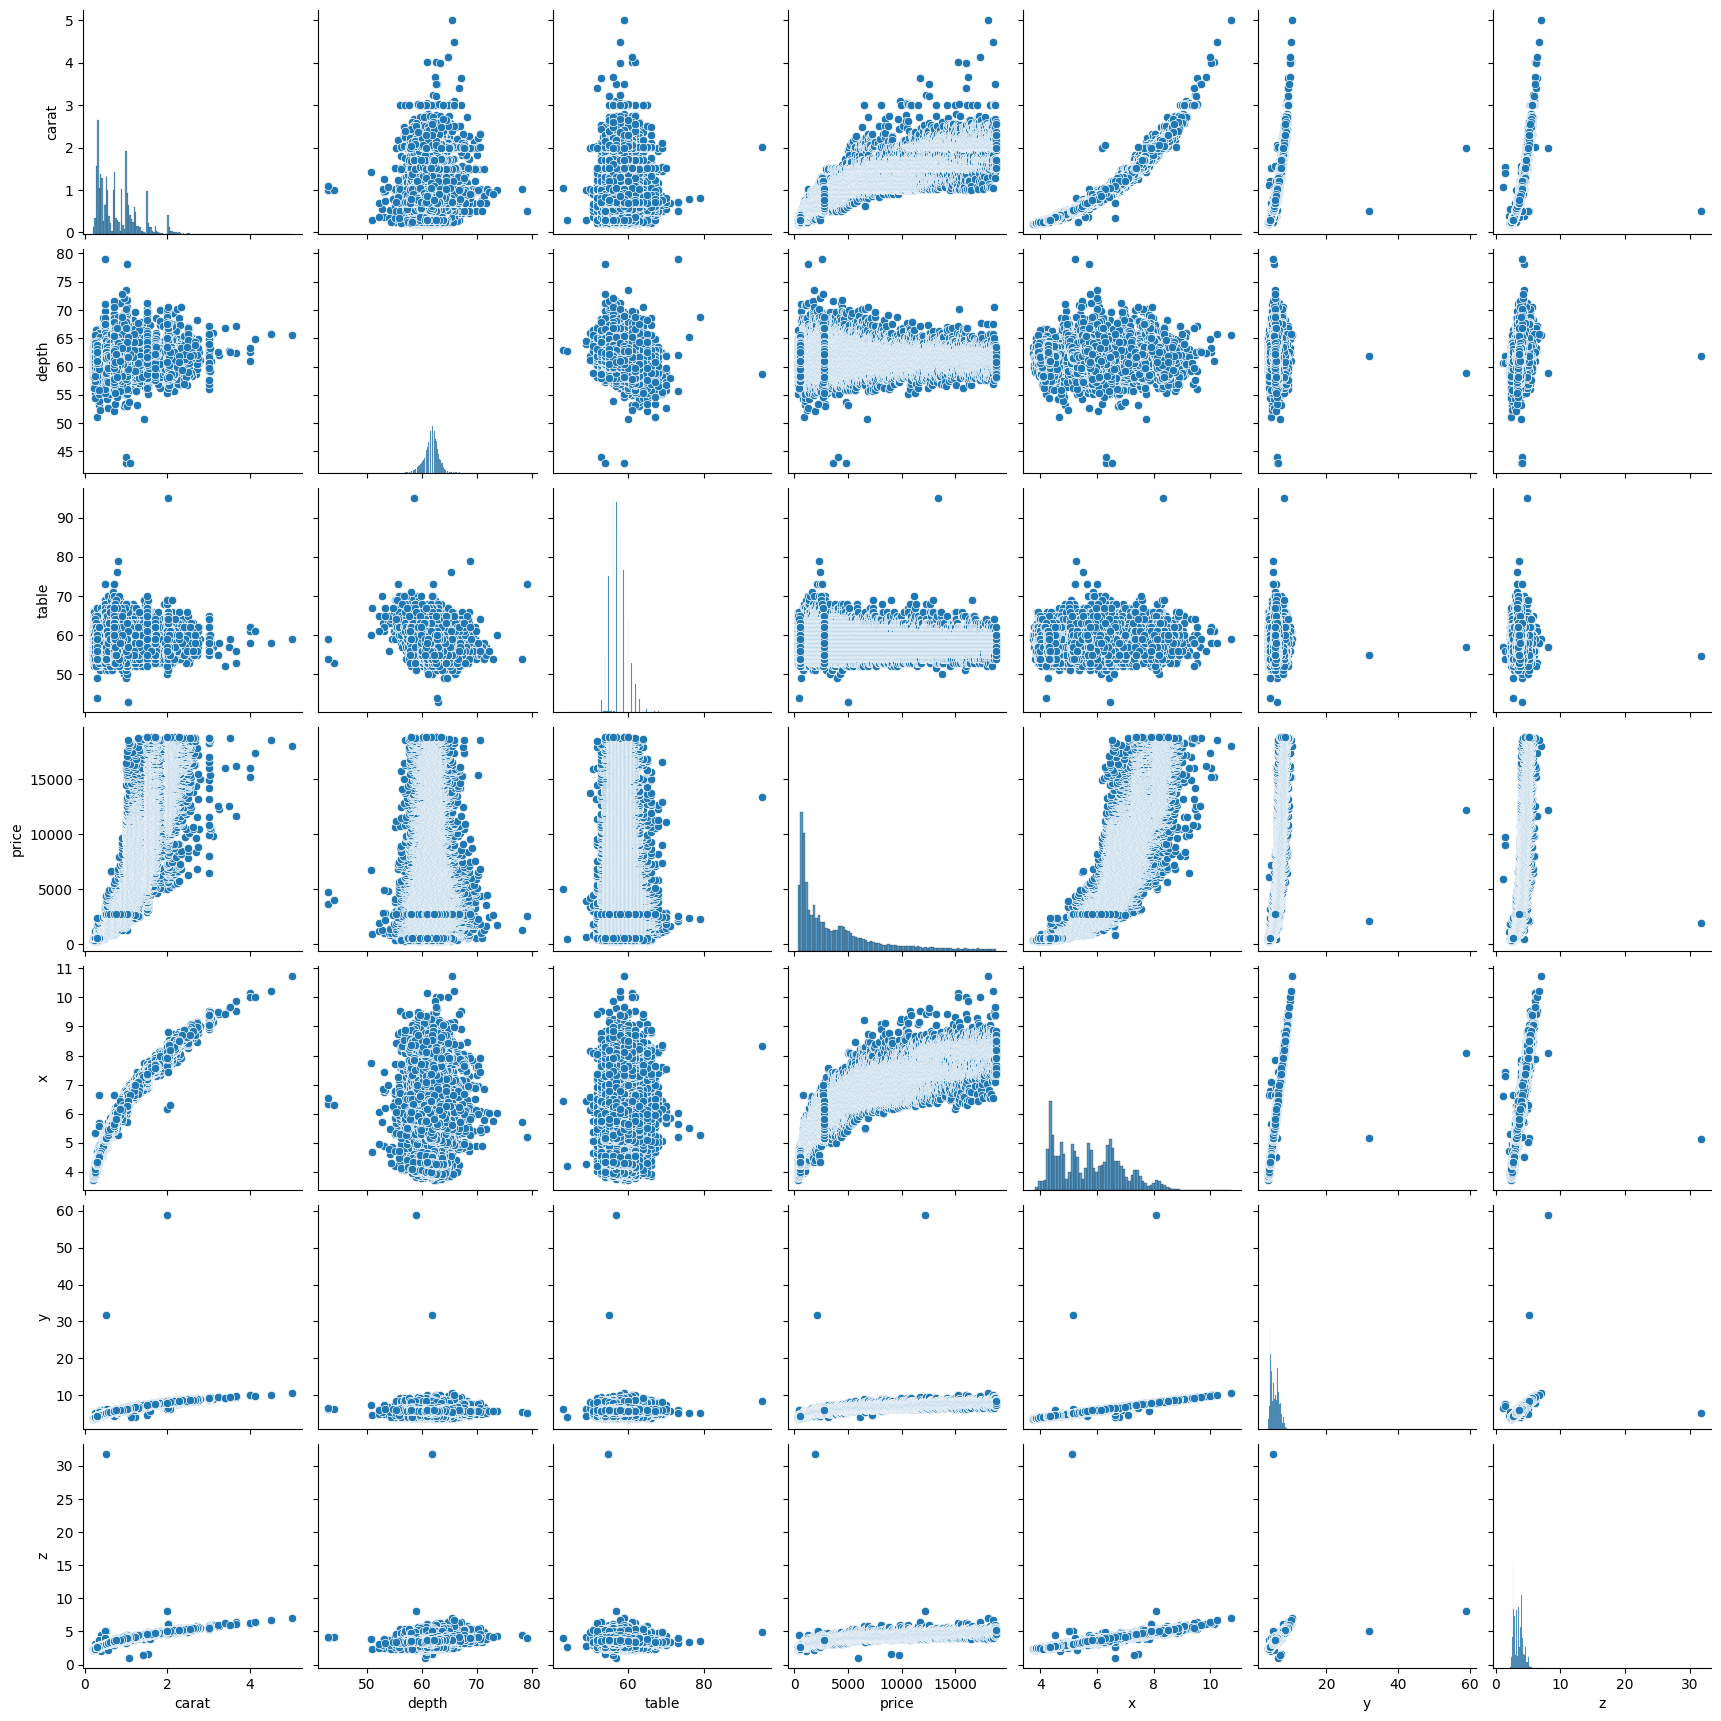

In [8]:
sns.pairplot(df)
plt.show()

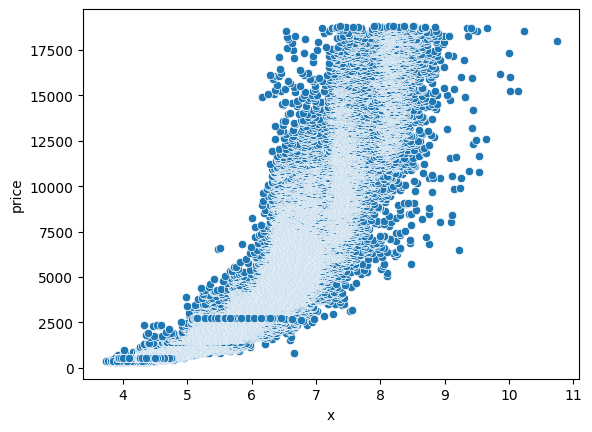

In [9]:
sns.scatterplot(x=df["x"], y=df["price"])
plt.show()

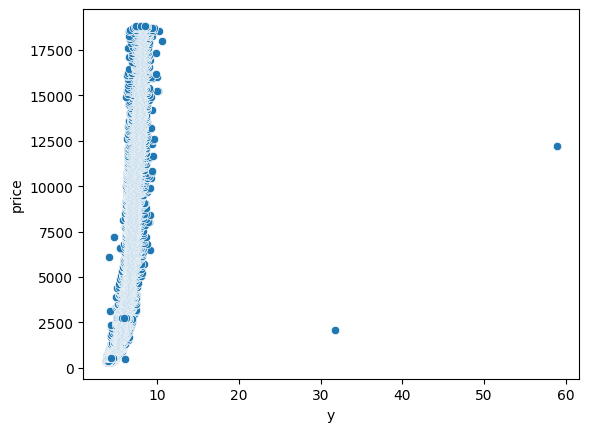

In [10]:
sns.scatterplot(x=df["y"], y=df["price"])
plt.show()

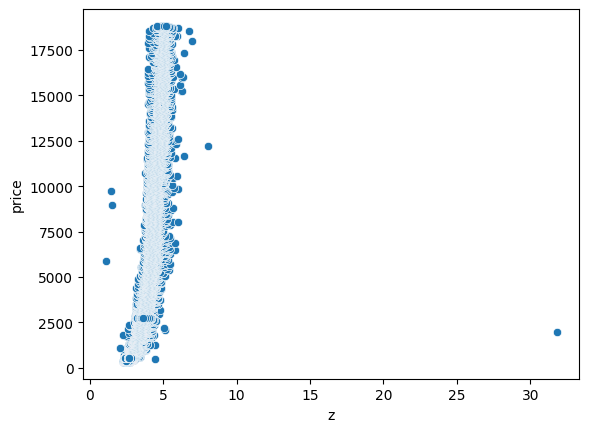

In [11]:
#there are clear outliers in y versus price
sns.scatterplot(x=df["z"], y=df["price"])
plt.show()

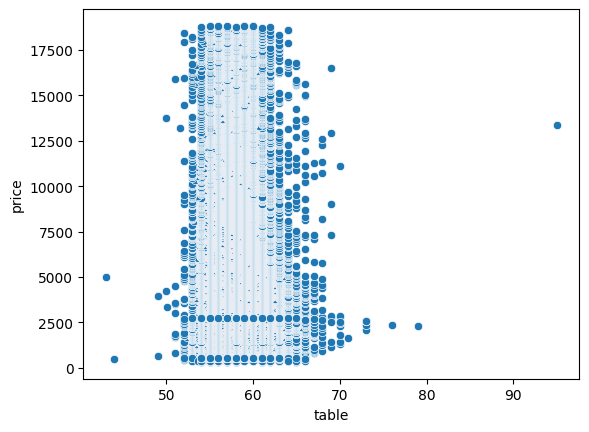

In [12]:
#there are outliers in z as well
sns.scatterplot(x=df["table"], y=df["price"])
plt.show()

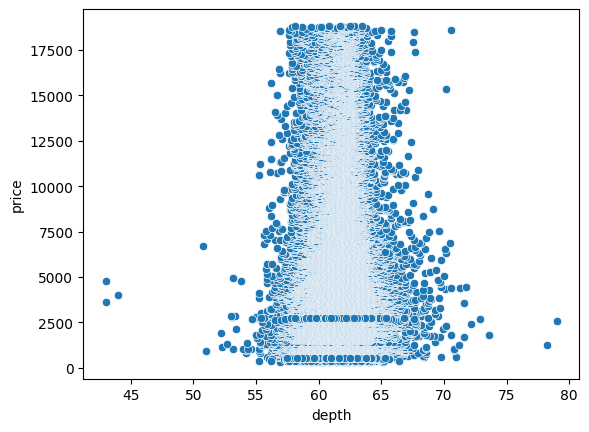

In [13]:
# there are outliers over here that might affect the outcome
sns.scatterplot(x=df["depth"], y=df["price"])
plt.show()

In [14]:
# there are some outliers over here as well, just by looking at the graphs we can eliminate outliers easily
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


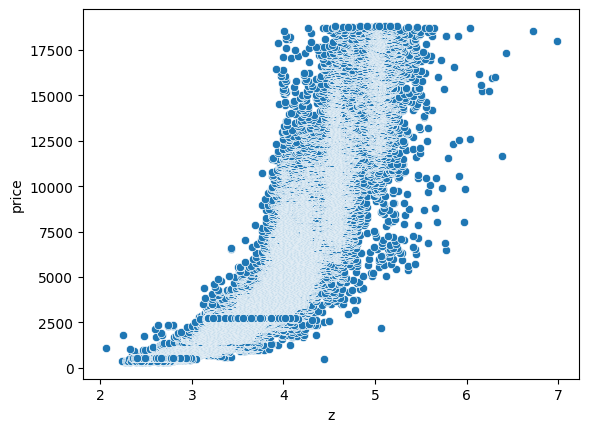

In [15]:
sns.scatterplot(x=df["z"], y=df["price"])
plt.show()

In [16]:
#we lost apprx 13 data and it looks much better now
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
#let's look at the categorical values
df['cut'].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: count, dtype: int64

In [18]:
df['color'].value_counts()

color
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [19]:
df['clarity'].value_counts()

clarity
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [20]:
#before encoding these, i will split this into train-test to avoid data leakage
X= df.drop(["price"],axis =1)
y= df["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=15)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
15200,1.15,2,4,2,62.4,54.0,6.71,6.76,4.20
14632,1.11,3,1,2,61.3,58.0,6.66,6.61,4.07
19151,1.21,1,2,5,63.7,58.0,6.67,6.71,4.26
29299,0.30,2,5,5,61.5,58.0,4.28,4.31,2.64
9983,1.00,4,2,2,63.1,57.0,6.37,6.33,4.01


In [21]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000
mean,0.796206,2.552708,2.594089,3.840861,61.753396,57.448897,5.727667,5.729408,3.537283
std,0.474132,1.025958,1.702470,1.724057,1.411827,2.221713,1.119875,1.111668,0.691941
min,0.200000,0.000000,0.000000,0.000000,52.200000,43.000000,3.730000,3.710000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.530000,4.030000
max,5.010000,4.000000,6.000000,7.000000,72.200000,73.000000,10.740000,10.540000,6.980000


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40430 entries, 15200 to 7630
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40430 non-null  float64
 1   cut      40430 non-null  int64  
 2   color    40430 non-null  int64  
 3   clarity  40430 non-null  int64  
 4   depth    40430 non-null  float64
 5   table    40430 non-null  float64
 6   x        40430 non-null  float64
 7   y        40430 non-null  float64
 8   z        40430 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


Mean absolute error 864.5945387870823
R2 Score 0.8850163452280001


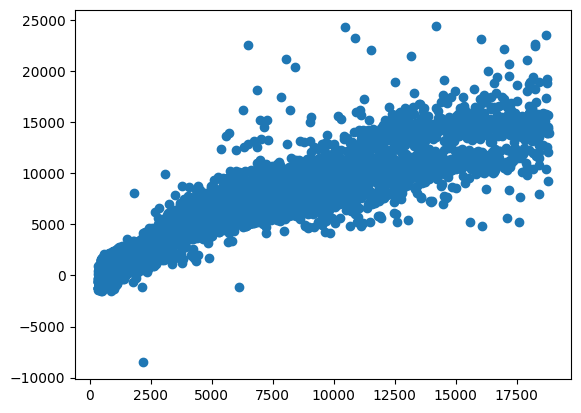

In [23]:
# model training
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
#first let's do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 1398.2632905135665
R2 Score 0.49245884122391603


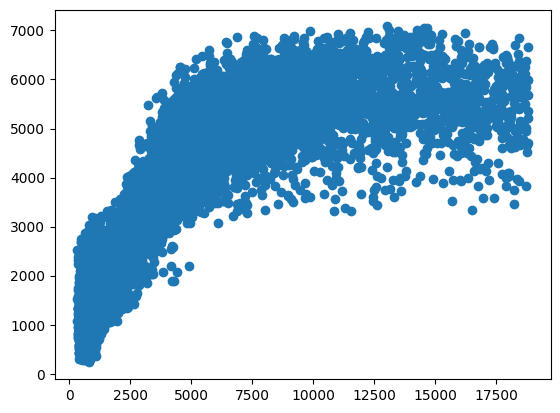

In [24]:
#second let's svm regression
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [25]:
## Hyperparameter Tuning using GridSearch CV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(SVR(), param_grid, refit = True,verbose = 3,n_jobs=-1) # n_jobs=-1 means use all processor
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [26]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Mean absolute error 482.0696886410443
R2 Score 0.9452198431184515


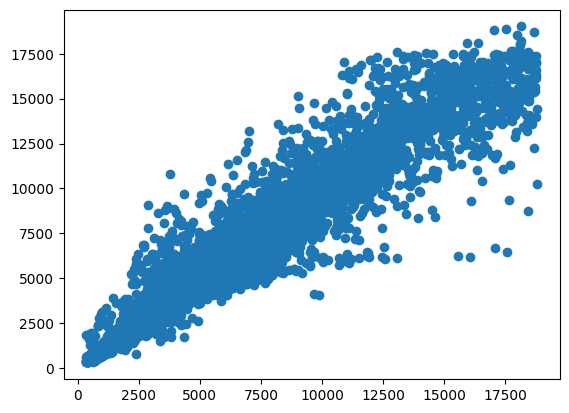

In [27]:
y_pred=grid.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()